In [8]:
# Uncomment to plot inline, however it is recommended to inspect plots in seperate figure windows is fullscreen. 
%matplotlib inline 

# import libraries
import numpy as np
import os
from PIL import Image   # ERON: didn't work out of the box
import kmedoids 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances


# Import the data from the Gigydata folder
npzfilename=os.path.join('/home/ronald/Desktop/P5-Clustering/GygiAnalysis/AnalysisOfGygiDataset.npz')
PTNdata= np.load(npzfilename) 
PTNdata=PTNdata['arr_0'].item()

# Load the three relevant datasets into lists 
xs=PTNdata['P_logsumE_off_FS']
ys=PTNdata['T_logsumE_off_FS']
zs=PTNdata['N_logsumE_off_FS']

# Visualization 1

This is a 3D representation of the classifion according to the Gigydata. The <span style = "color:green"> **green triangles** </span> indicate the sounds classified as **Pulse sounds**, the <span style = "color:red"> **red circles ** </span> indicate the sound classified as **Noise sounds** and finally the <span style = "color:blue"> **blue squares** </span> indicate the **tone sounds**. This visualization provides a dynamic overview of how all datapoints are distributed along the PTN axes. 

<font color='red'>ERON: This is more like the caption. In the text I 
expect motivation and explanation. </font>

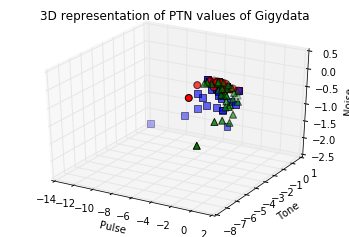

In [2]:
# Create figure with a subplot object with a 3D projection and set XYZ axis
fig1 = plt.figure(1)
vis1 = fig1.add_subplot(111, projection='3d')
zdirs = (None, 'x', 'y', 'z', (1, 1, 0), (1, 1, 1))

# Create the 3D plot with different markers for three classifications
for typecolor, typemarker  in [('r','o'),('g','^'),('b','s')]:
    typerange=PTNdata['typecolors'][typecolor]
    vis1.scatter(xs[typerange],ys[typerange],zs[typerange], c=typecolor, marker=typemarker,s=48)

# Set title and axis labels and show the 3D graph
vis1.set_title('3D representation of PTN values of Gigydata') 
vis1.set_xlabel('Pulse ')
vis1.set_ylabel('Tone ')
vis1.set_zlabel('Noise ') 

# uncomment to show plot, close plot to continue script
plt.show()

# Visualization 2

In this visualization three histograms can be seen. Each represent the number of occurences for certain values of <span style = "color:green">Pulse </span>, <span style = "color:red"> Tone </span> or <span style = "color:blue"> Noise </span> datapoints. This representation of the data provides an overview of how each variable is distibuted. 

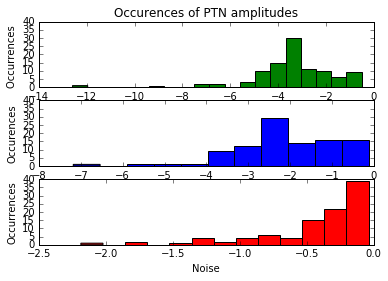

In [3]:
# Create a figure with three plot objects
fig2, (vis21, vis22, vis23) = plt.subplots(3, sharey=True)

# First subplot
vis21.hist(xs, bins='auto', color = 'g')
vis21.set_title('Occurences of PTN amplitudes')
vis21.set_xlabel('pulse ')
vis21.set_ylabel('Occurrences ')

# Second subplot
vis22.hist(ys, bins='auto', color = 'b')
vis22.set_xlabel('Tone')
vis22.set_ylabel('Occurences')

# Thirds subplot
vis23.hist(zs, bins='auto', color = 'r')
vis23.set_xlabel('Noise')
vis23.set_ylabel('Occurrences')

# uncomment to show plot, close plot to continue program
plt.show()

# Clustering

In this script the unclustered data is plugged into a clustering script based on the **K-mediod** method that uses the **Manhattan metric**. The **Manhattan metric** is the simple sum of horizontal and vertical components. The inputted data consists of the Pulse and Tone values of the datapoints. The output of this script is an object containing the clustered data.

In [4]:
# K-medoids script from:
# Bauckhage C. Numpy/scipy Recipes for Data Science: k-Medoids Clustering[R]. Technical Report, University of Bonn, 2015.

data = np.array([xs,ys]).T

# distance matrix
D = pairwise_distances(data, metric='manhattan')

# split into 3 clusters
M, C = kmedoids.kMedoids(D, 3)

# split the clustered data object C into three lists with clustered datapoints
cluster1 = data[C[0]]
cluster2 = data[C[1]]
cluster3 = data[C[2]]

# Visualization 3

This visualization is a 2D scatter plot of the clustered data. As the initial mediods are chosen randomly, the cluster colors can change each time the script is run.

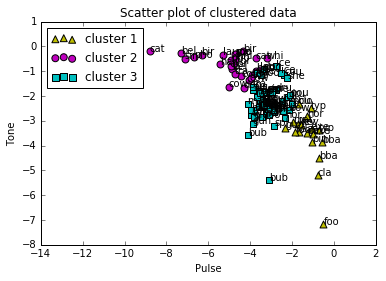

In [5]:
# create a figure 
fig3 = plt.figure(3)
vis3 = fig3.add_subplot(111)

# add the three clusters to the figure with different markers

vis3.scatter(cluster1[:,0],cluster1[:,1], c='y', marker="^", label='cluster 1', s=48)
vis3.scatter(cluster2[:,0],cluster2[:,1], c='m', marker="o", label='cluster 2', s=48)
vis3.scatter(cluster3[:,0],cluster3[:,1], c='c', marker="s", label='cluster 3', s=48)

for label, x, y in zip(PTNdata['labels'], xs,ys):
    vis3.text(x, y, label[:3], None)    

plt.legend(loc='upper left');

vis3.set_title('Scatter plot of clustered data')
vis3.set_xlabel('Pulse')
vis3.set_ylabel('Tone')

# uncomment to show plot, close plot to continue program
plt.show()

# Visualization 4

This visualization can be used to compare the **origional classification** of the Gigydata with the output of the **clustering algorithm** above, shown in visualization 3.  


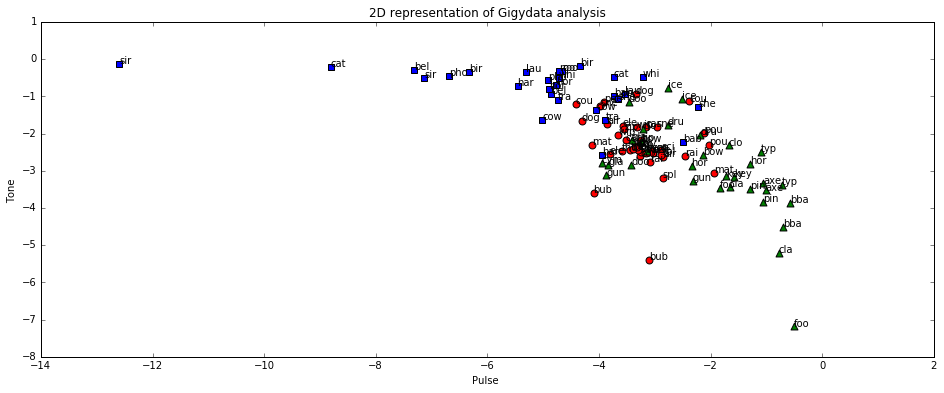

In [6]:
fig4 = plt.figure(4, figsize=(16,6,))
vis4 = fig4.add_subplot(1,1,1)

for typecolor, typemarker  in [('r','o'),('g','^'),('b','s')]:
    typerange=PTNdata['typecolors'][typecolor]
    vis4.scatter(xs[typerange],ys[typerange], c=typecolor, marker=typemarker,s=48)


for label, x, y in zip(PTNdata['labels'], xs,ys):
    vis4.text(x, y, label[:3], None)    

vis4.set_xlabel('Pulse ')
vis4.set_ylabel('Tone ')
vis4.set_title('2D representation of Gigydata analysis')

# uncomment to show plot, close plot to continue program
plt.show()

# Conclusion

Each time the clustering script is run, the sounds labelled 'ice', 'cou' and 'she' are within the same cluster. However, in the Gigydata analysis the three sounds are classified as Pulse, Tone and Noise sounds respectively. Furthermore, the sound labelled 'bub' is a clear outlayer. When comparing the results with Kevin and Danita, whom used the **K-means** method with **Euclidian** metric, the outcome is more or less similar. However, the bounds of the cluster vary between the two methods. One thing that we can notice, it that the K-means method seems to create a larger central (Noise sound) cluster. 

In [9]:
# Shows all plots. NOTE: only works if all other plt.show() are commented. 
#plt.show()

# all plots have to be closed (or put inline) before the kmeans image opens
image = Image.open('kmeans.jpg')
image.show()

IOError: [Errno 2] No such file or directory: 'kmeans.jpg'

<font color='red'> fdhlkasjdfhl </font>

Rubric and Grade:
    
<table border="1">
<tr><th></th><th>Weight</th><th>Insufficient (4)</th><th>Fair (6)</th><th>Good (8)</th><th>Excellent (10)</th></tr>
<tr>
<td>Text Quality</td><td>0.2</td><td></td><td>Texts are present, but incomplete.</td><td>Texts are present and complete</td><td>Texts are present and complete and show mastery of the subject matter.</td>
</tr>
<tr><th></th><th>Score</th><th> </th><th>Present </th><th> </th><th> </th></tr>
<tr>
<td>Figures</td><td>0.2</td><td></td><td>4 out of 4 requested figures are present.</td><td>4 out of 4 requested figures are present with clear captions and axes.</td><td>4 out of 4 requested figures are present with clear captions and axes. There is a clear relation with the preceding and/or following comments.</td>
</tr>
<tr><th></th><th>Score</th><th> </th><th> </th><th>Captions in text </th><th> </th></tr>
<tr>
<td>Clustering Code</td><td>0.6</td><td></td><td>Clustering algorithms have been called with correct data, and the outcome is discussed.</td><td>Clustering algorithms have been called with correct data, the outcome is discussed and compared with outcomes of other methods used by fellow students.</td><td>Clustering algorithms have been called with correct data, the outcome is and compared with outcome other methods used by feloow students. Applicability of the clustering method to the SensorCity challenge is evaluated, and a convincing choice of method for the SensorCity challenge is presented.</td>
</tr>
<tr><th></th><th>Score</th><th> </th><th> Patially: Comparison present/ discussion lacking </th><th> </th><th> </th></tr>
</table>
    

In [10]:
Score=6*0.6+8*.2+6*.2
print(Score)

6.4
